In [1]:
import pandas as pd
import csv

df_train = pd.read_csv('./data/act_train.csv')

# date column에서 int 형식만 남기는 작업
def datetime_str_converter(data):
    
    datetime = list(data['date'])
    year_list, month_list, day_list = [], [], []
    for item in datetime:
        year_list.append(item[:4])
        month_list.append(item[5:7])
        day_list.append(item[8:10])

    return year_list, month_list, day_list

# train dataset에 함수 적용
year_list, month_list, day_list = datetime_str_converter(df_train)
date_list = []
for year, month, day in zip(year_list, month_list, day_list):
    date_list.append(int(year + month + day))
    
df_train['act_date'] = date_list
del df_train['date']

In [2]:
df_char_10 = df_train['char_10']
df_char_10 = df_char_10.fillna('type0')

del df_train['char_10']

df_train_re = pd.concat([df_train, df_char_10], axis=1)

df_train_nan = df_train_re.dropna()

df_train_nan.nunique()

people_id             75986
activity_id          157615
activity_category         1
char_1                   51
char_2                   32
char_3                   11
char_4                    7
char_5                    7
char_6                    5
char_7                    8
char_8                   18
char_9                   19
outcome                   2
act_date                411
char_10                   1
dtype: int64

In [3]:
df_train_nan

,people_id,activity_id,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,outcome,act_date,char_10
52,ppl_100025,act1_9923,type 1,type 3,type 5,type 1,type 1,type 6,type 3,type 3,type 6,type 8,0,20221125,type0
105,ppl_100033,act1_198174,type 1,type 36,type 11,type 5,type 1,type 6,type 1,type 1,type 4,type 1,0,20220726,type0
106,ppl_100033,act1_214090,type 1,type 24,type 6,type 6,type 3,type 1,type 3,type 4,type 5,type 1,0,20230615,type0
107,ppl_100033,act1_230588,type 1,type 2,type 2,type 3,type 3,type 5,type 2,type 2,type 4,type 2,0,20230228,type0
108,ppl_100033,act1_271874,type 1,type 2,type 5,type 3,type 2,type 6,type 1,type 1,type 6,type 8,0,20220726,type0
124,ppl_100035,act1_104259,type 1,type 5,type 2,type 7,type 3,type 1,type 3,type 5,type 4,type 7,1,20230728,type0
125,ppl_100035,act1_188526,type 1,type 5,type 2,type 8,type 3,type 1,type 2,type 6,type 9,type 13,1,20230203,type0
126,ppl_100035,act1_212220,type 1,type 3,type 2,type 8,type 3,type 1,type 2,type 3,type 9,type 13,1,20230202,type0
127,ppl_100035,act1_313621,type 1,type 5,type 2,type 8,type 3,type 1,type 2,type 2,type 9,type 13,1,20230203,type0
128,ppl_100035,act1_336085,type 1,type 5,type 2,type 8,type 3,type 1,type 2,type 2,type 9,type 13,1,20230203,type0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

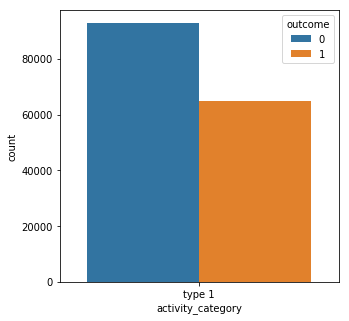

In [26]:
plt.figure(figsize=(5,5)).add_subplot(1,1,1)
sns.countplot(x = 'activity_category', hue = 'outcome', data = df_train_nan)
plt.show()

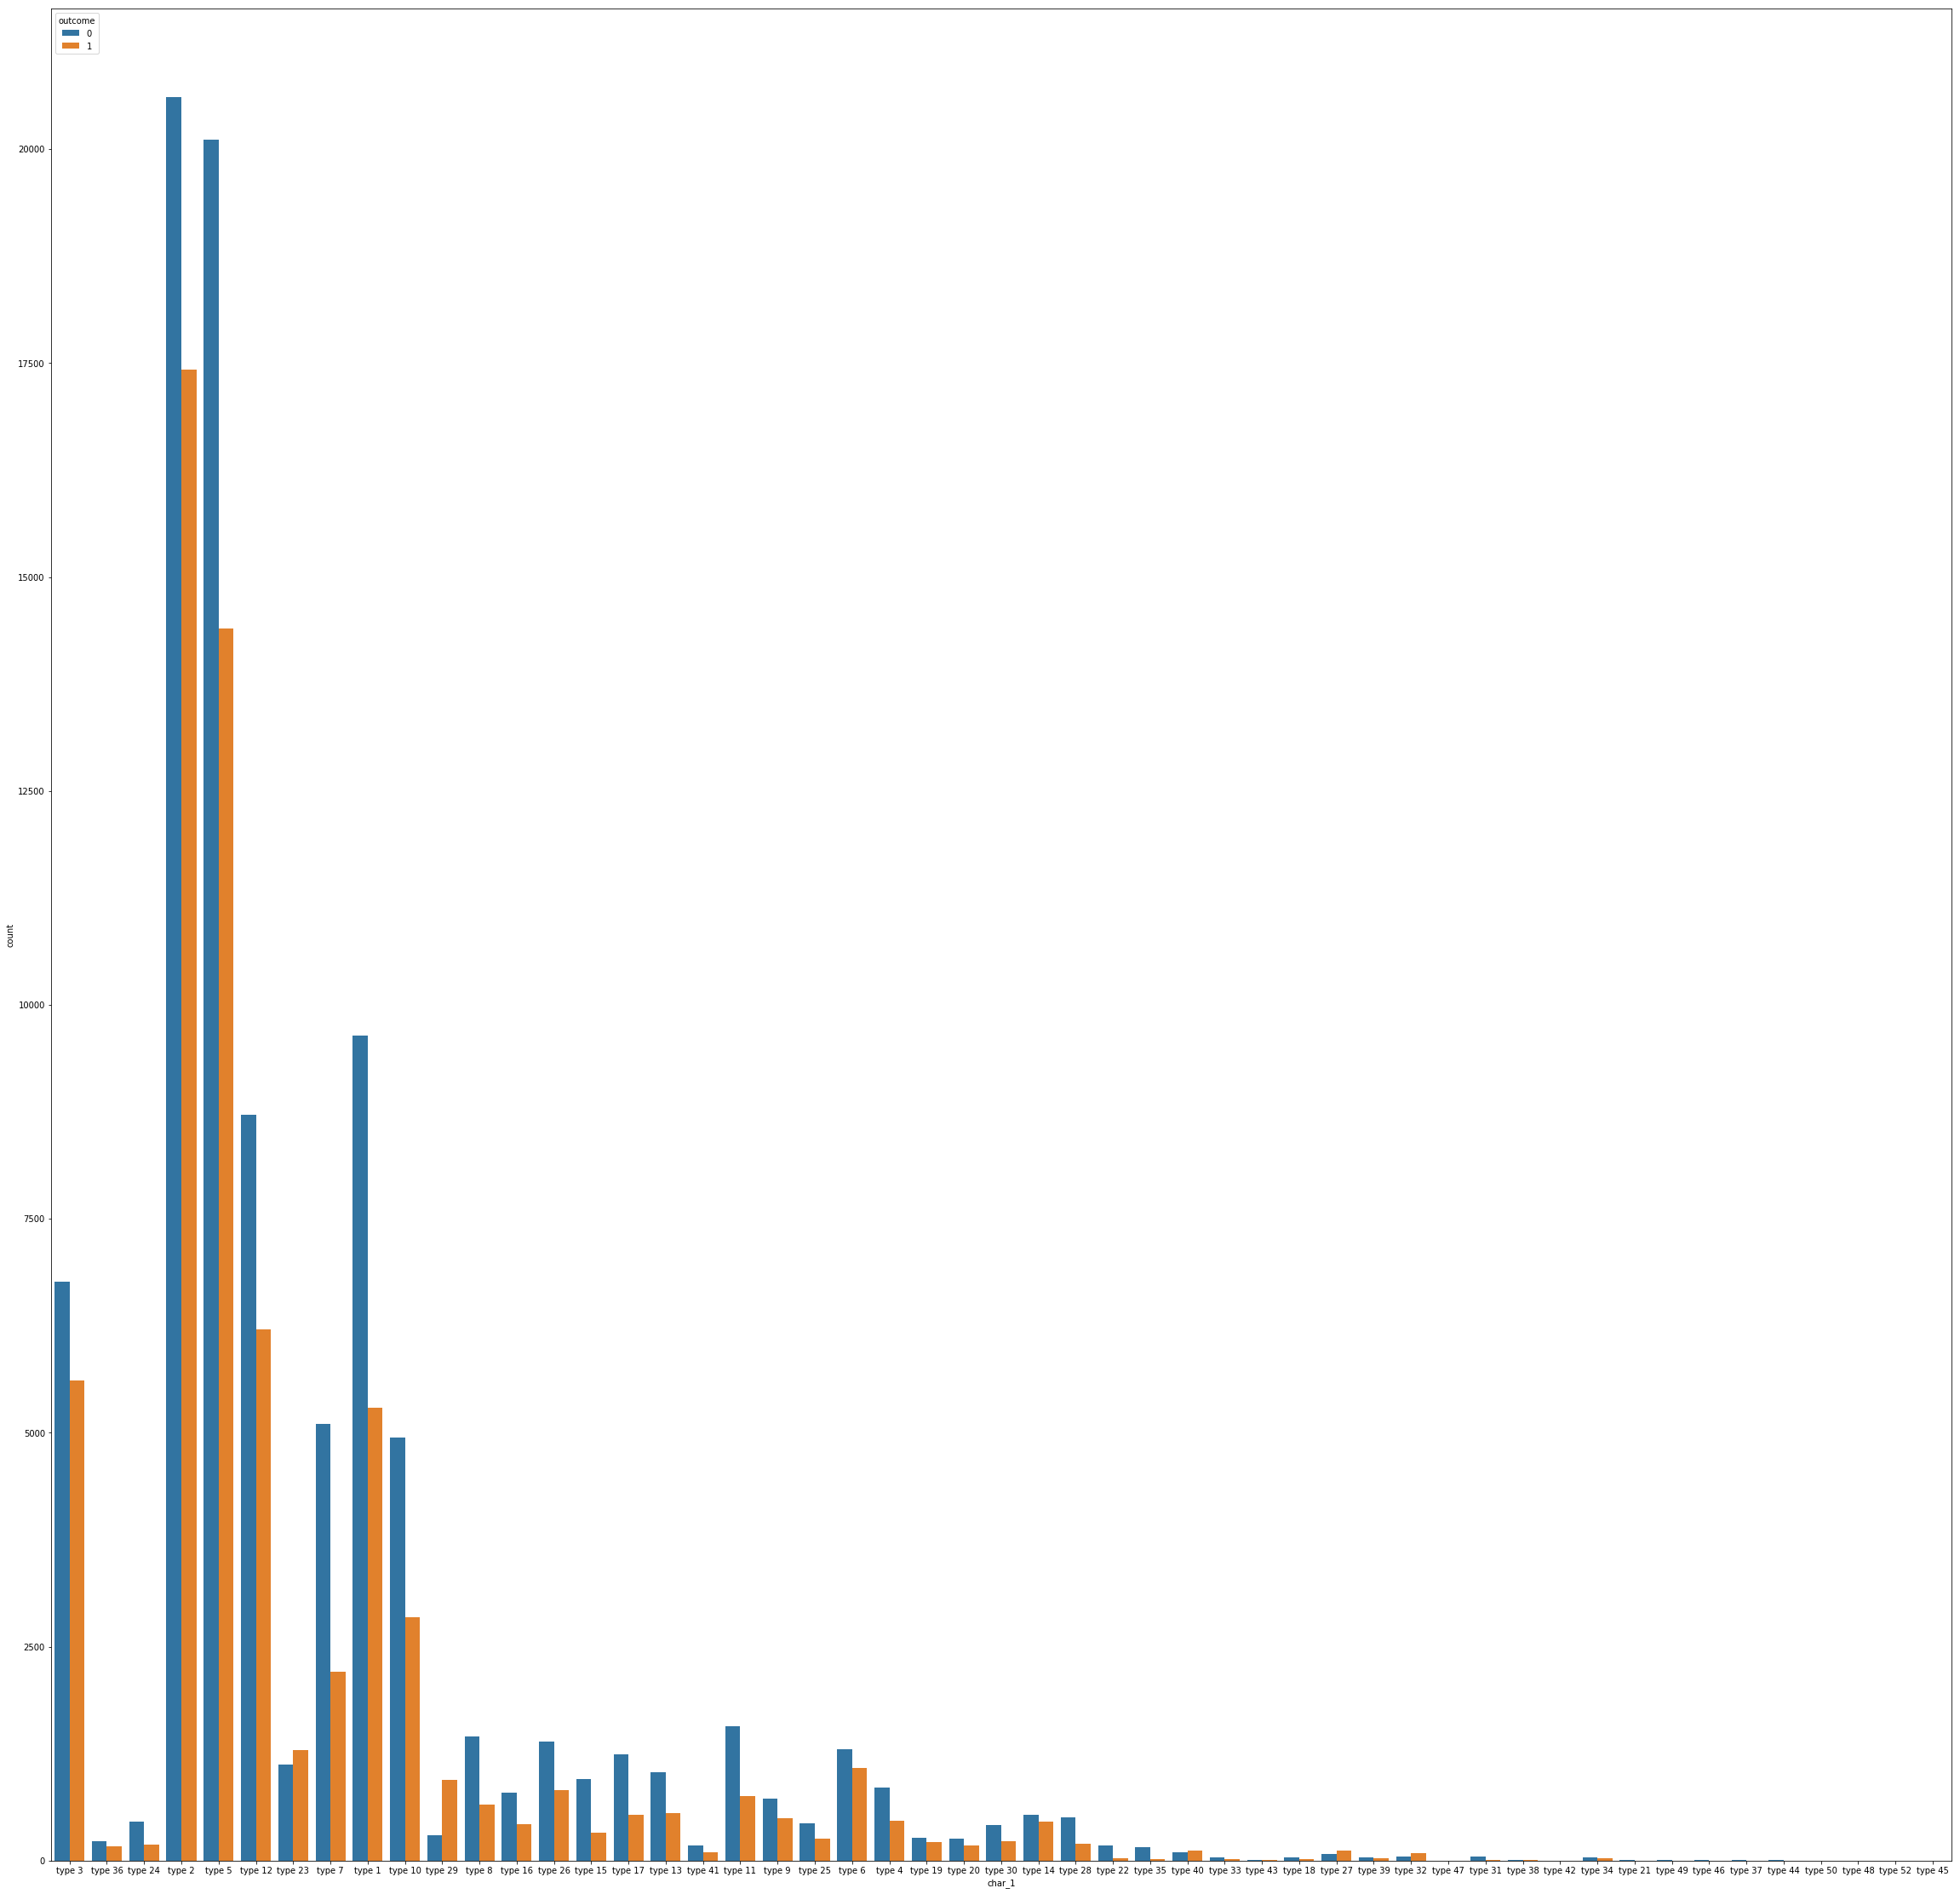

In [14]:
plt.figure(figsize=(40,40)).add_subplot(1,1,1)
sns.countplot(x = 'char_1', hue = 'outcome', data = df_train_nan)
plt.show()

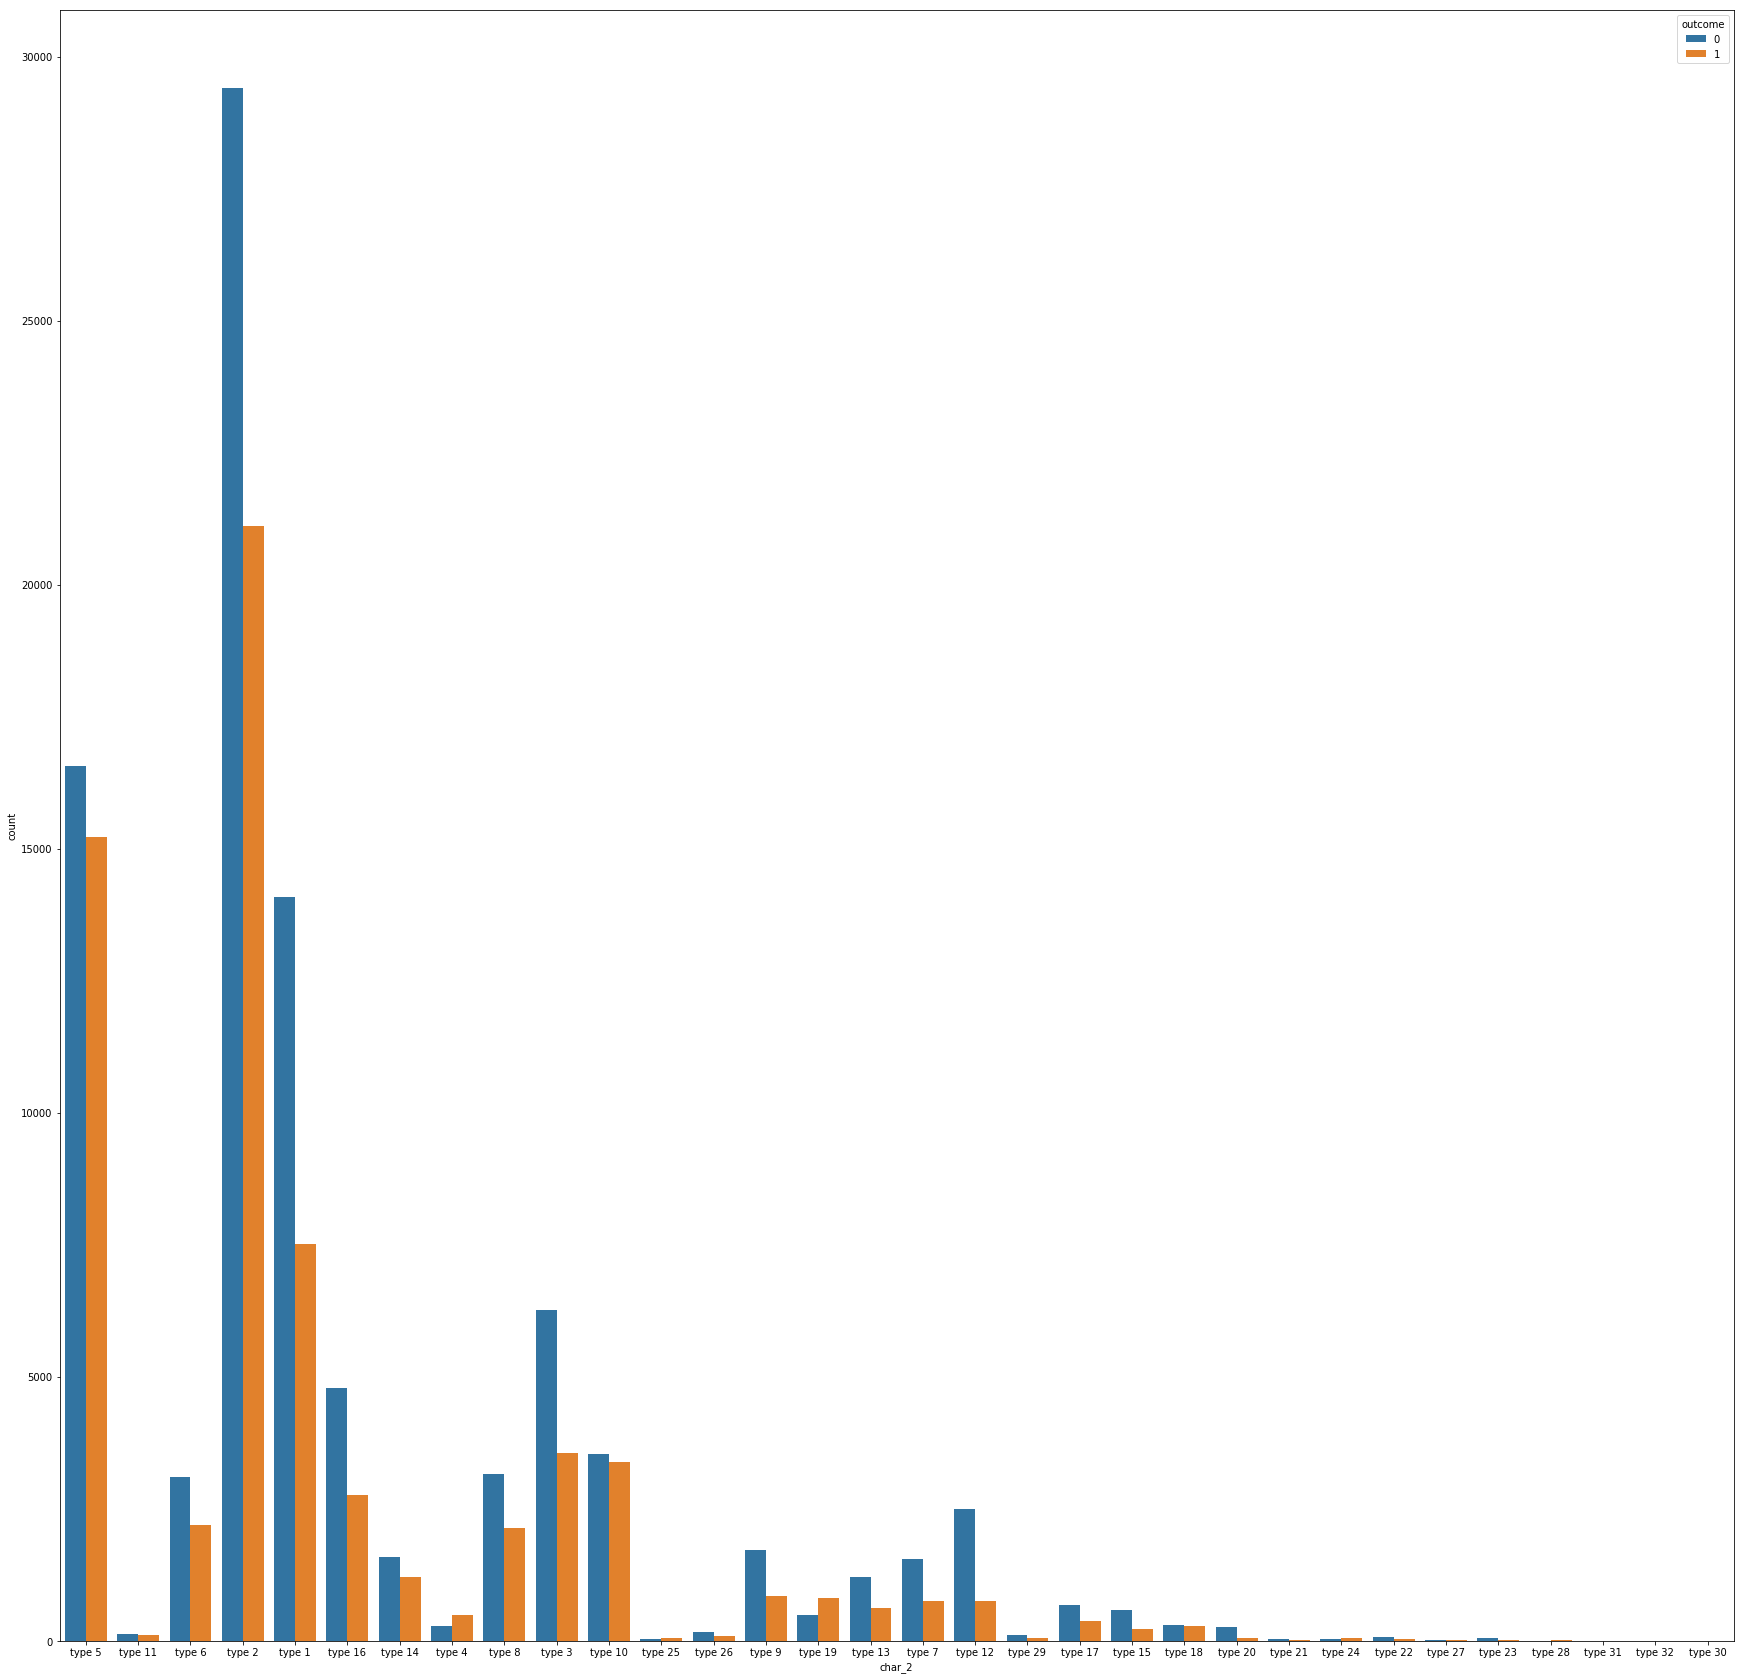

In [19]:
plt.figure(figsize=(30,30)).add_subplot(1,1,1)
sns.countplot(x = 'char_2', hue = 'outcome', data = df_train_nan)
plt.show()

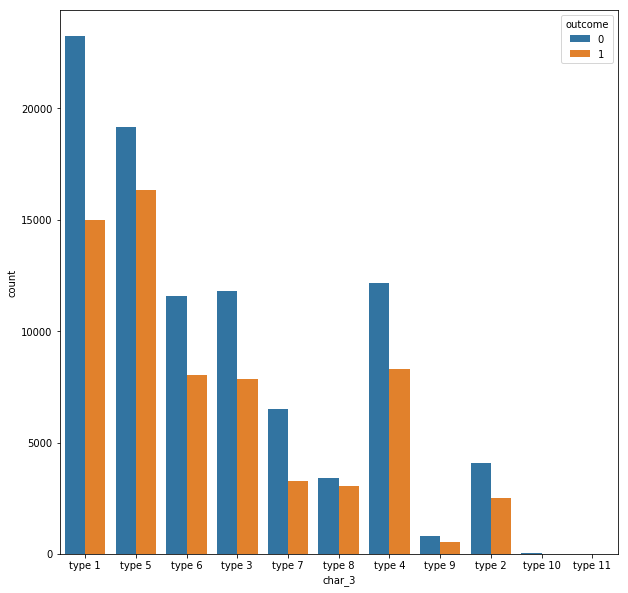

In [18]:
plt.figure(figsize=(10,10)).add_subplot(1,1,1)
sns.countplot(x = 'char_3', hue = 'outcome', data = df_train_nan)
plt.show()

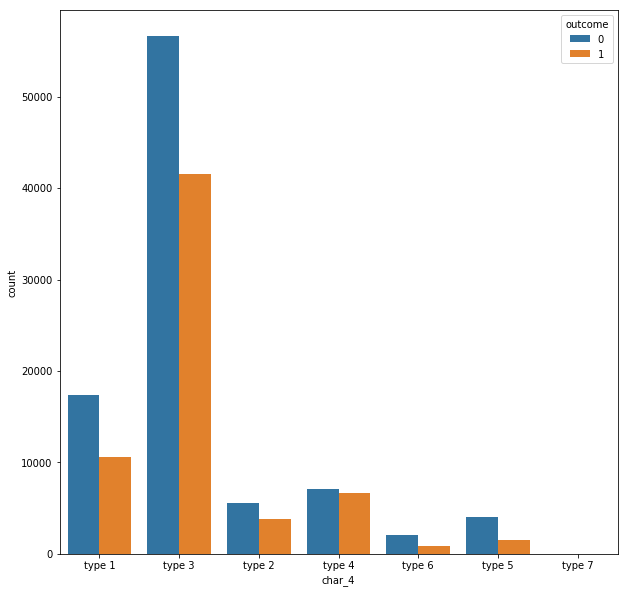

In [20]:
plt.figure(figsize=(10,10)).add_subplot(1,1,1)
sns.countplot(x = 'char_4', hue = 'outcome', data = df_train_nan)
plt.show()

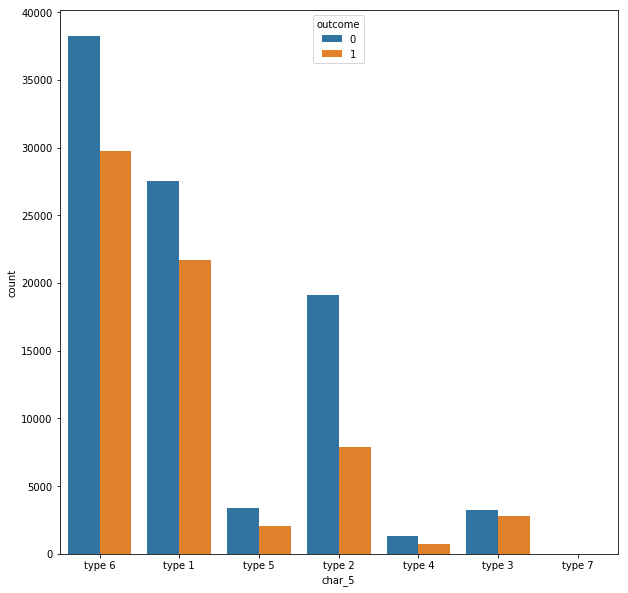

In [21]:
plt.figure(figsize=(10,10)).add_subplot(1,1,1)
sns.countplot(x = 'char_5', hue = 'outcome', data = df_train_nan)
plt.show()

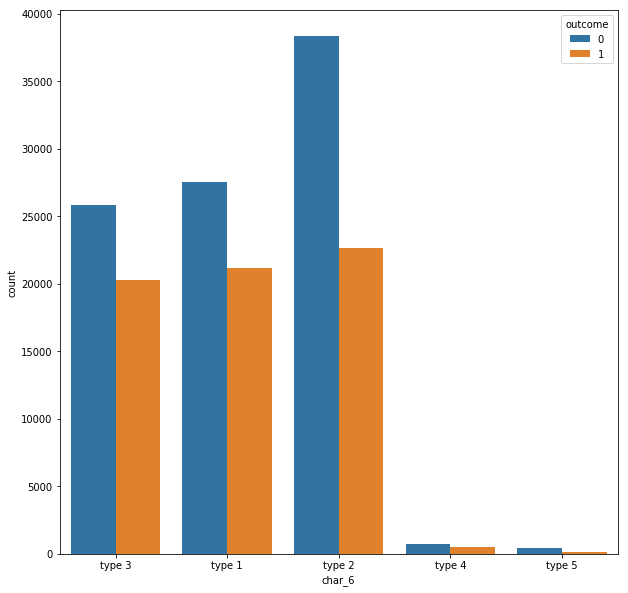

In [22]:
plt.figure(figsize=(10,10)).add_subplot(1,1,1)
sns.countplot(x = 'char_6', hue = 'outcome', data = df_train_nan)
plt.show()

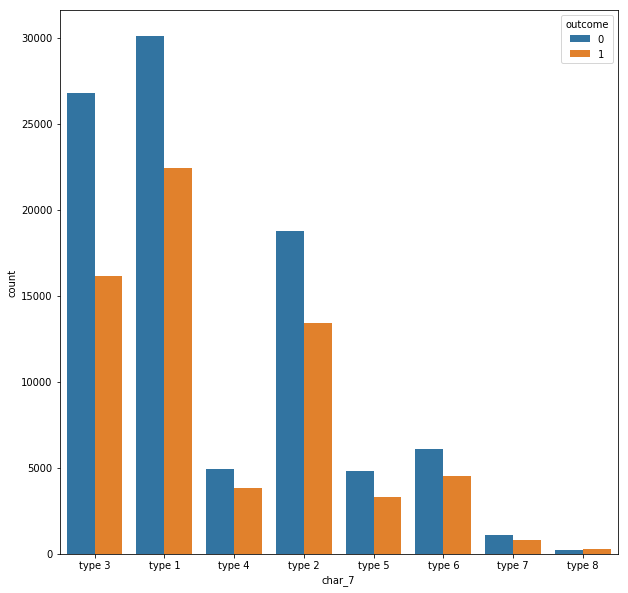

In [23]:
plt.figure(figsize=(10,10)).add_subplot(1,1,1)
sns.countplot(x = 'char_7', hue = 'outcome', data = df_train_nan)
plt.show()

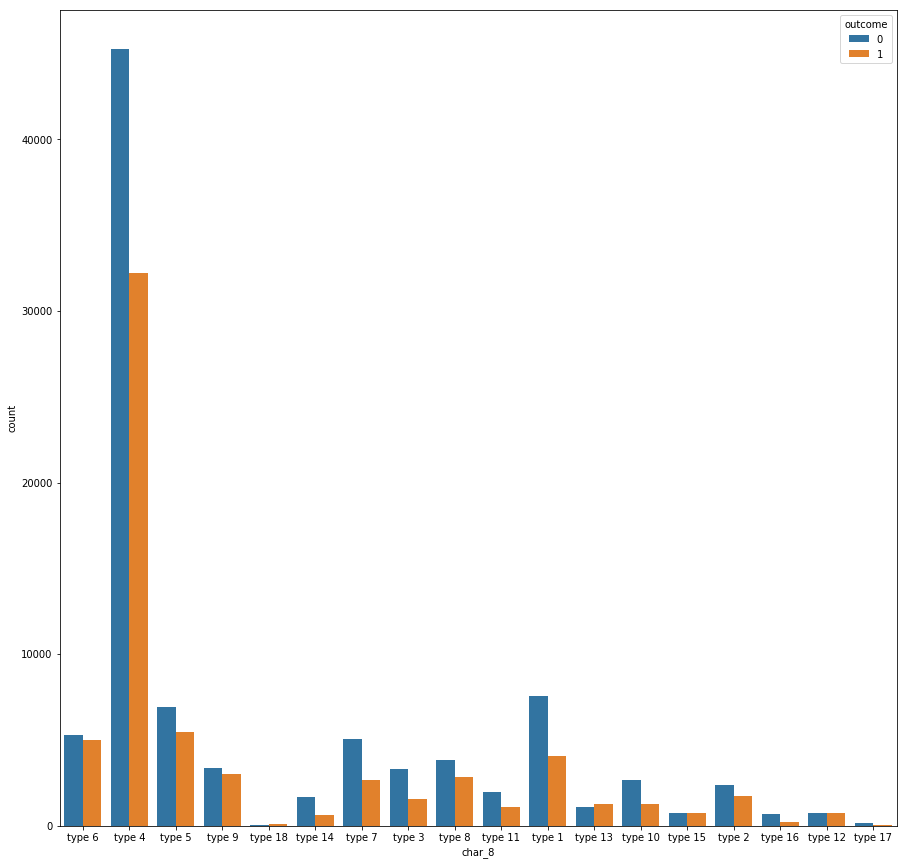

In [24]:
plt.figure(figsize=(15,15)).add_subplot(1,1,1)
sns.countplot(x = 'char_8', hue = 'outcome', data = df_train_nan)
plt.show()

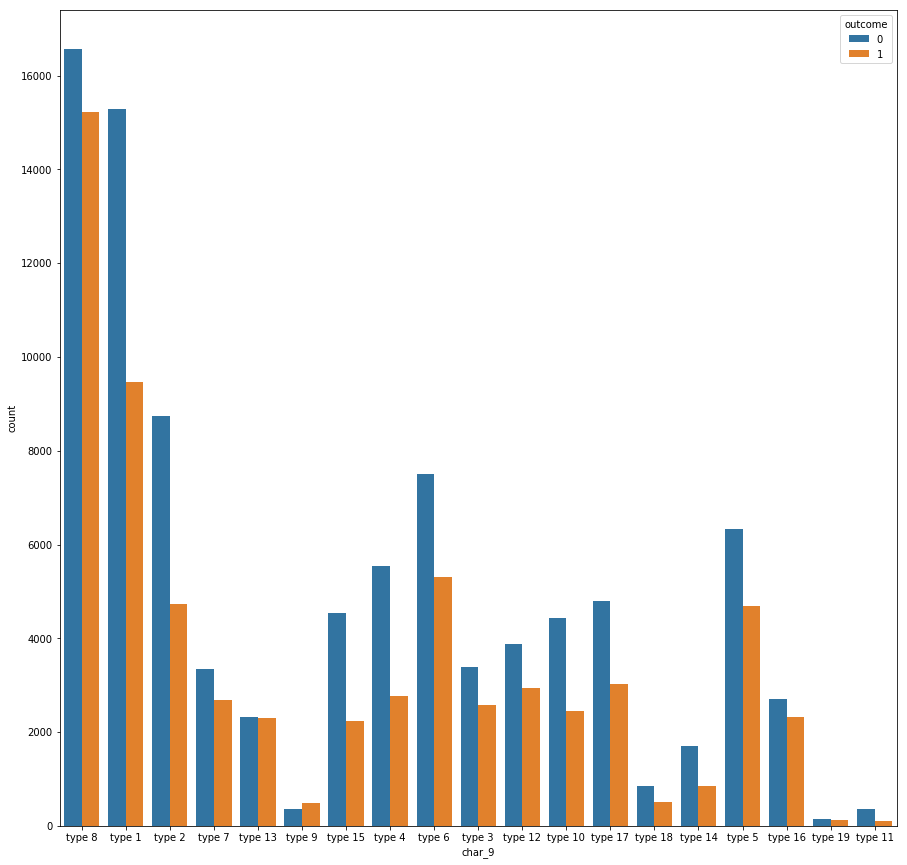

In [25]:
plt.figure(figsize=(15,15)).add_subplot(1,1,1)
sns.countplot(x = 'char_9', hue = 'outcome', data = df_train_nan)
plt.show()

## 카운트플롯의 형태를 보면, activity_category 의 type1의 outcome value의 분포와 char1~9 의 그것에 유의미한 차이를 보여주는 column이 존재하지 않는다. 따라서 그냥 drop해도 될 듯하다.

In [27]:
del df_train['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9']

df_train

KeyError: ('char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9')